(1499, 67)
(1499,)
(67,)



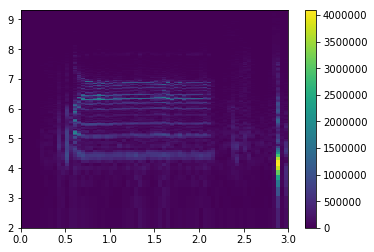

In [40]:
import scipy.io.wavfile
import wave
import matplotlib.pyplot as plt
import numpy as np

def loadData(wavFile):
    w = scipy.io.wavfile.read(wavFile)
    sampRate = w[0]
    data = np.array(w[1])
    return sampRate, data


def plotData(data, sampRate):
    totTime = float(len(data))/float(sampRate) 
    
    t = np.linspace(0.0, totTime,len(data))
    plt.plot(t, data)
    plt.show()
    
def fftPlot(fft, freq):
    #plt.plot(freq, fft.real)
    #plt.plot(freq, fft.imag)
    ftAbs = np.sqrt(fft.real**2+fft.imag**2)
    plt.plot(freq, ftAbs)
    plt.show()
    
    
def truncateData(sampRate, data, timeWindow):
    fpw = int(np.floor(sampRate* timeWindow))
    totFrames = len(data)
    nWindows = totFrames/fpw
    newTotFrames = nWindows *fpw
    newDat = data[0:newTotFrames]
    return newDat
    
def fft(data,freqLength):

    fft = np.fft.fft(data, freqLength)
    return fft

def windowData(data, begTime, endTime, sampRate):
    begFrame = int(begTime*sampRate)
    endFrame = int(endTime*sampRate)
    dataSamp = data[begFrame:endFrame]
    dat = np.zeros(len(data))
    dat[begFrame:endFrame]= dataSamp
    return dataSamp

def avgSquare(datasamp):
    np.sum(datasamp.astype(float), datasamp.astype(float))/float(len(datasamp))
    
def constructFftWindow(wavFile, timeWindow):
    sRate, data = loadData(wavFile)
    data = truncateData(sRate, data, timeWindow)
    nframes = (len(data))
    # windows per frame
    fpw = int(sRate* timeWindow)
    nWind = nframes/fpw
    #tArray = np.zeros((nWind, len(data)))
    #fArray = np.zeros((nWind, len(data)))

    freq = np.fft.fftfreq(6000, 1.0/sRate)
    lnFreq = np.log(freq[1:len(freq)/4])
    ftArray = np.zeros((len(freq)/4-1, nWind))
    t = np.linspace(0, nframes/sRate, nWind)
    for i in range(nWind): 
        begTime = i*timeWindow
        endTime = (i+1)*timeWindow
        windData = windowData(data, begTime, endTime, sRate)
        #print np.sum(windData)
        ft = fft(windData, len(freq))
        ftAbs =  np.sqrt((ft.real[1:len(freq)/4])**2 + (ft.imag[1:len(freq)/4])**2)
        #print np.sum(ftAbs)
        #tArray[i, :] = np.ones(len(data))* begTime
        #fArray[i, : ] = freq
        ftArray[:, i] = ftAbs
    print np.shape(ftArray)
    print np.shape(lnFreq)
    print np.shape(t)
    cmap= plt.get('Blues')
    #fig, ax = plt.subplots(1,1)
    plt.axis([t.min(), t.max(), lnFreq.min(), lnFreq.max()])
    plt.pcolor(t,lnFreq, ftArray, cmap=cmap, vmin=ftArray.min(), vmax = ftArray.max())
    #plt.pcolormesh(tArray,fArray,ftArray)
    plt.colorbar()
    plt.show()

constructFftWindow('ali.wav', 0.050)
#sRate, data = loadData("emeril.wav")


#dataNew = truncateData(sRate, data, 0.05)

#ft, freq = fft(dataNew, sRate)
#fftPlot(ft,freq)
#plt.plot(timeSmall, dataSmall)
#t = np.linspace(0, totTime, len(data))
#plt.plot(t,data)
#freq = np.fft.fftfreq(len(dataSmall), 1.0/sampRate)
#fft = np.fft.fft(dataSmall, len(freq))
#plt.plot(freq, fft.real)
#plt.plot(freq, fft.imag)

#plt.plot(freq,fft.real)
#plt.plot(freq[0:100000],fft.imag[0:100000])
#plt.show()